In [ ]:
# Import relevant libraries for mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the datasets
file_path1 = '/content/drive/Shareddrives/ENG M 680/Datasets/processed_weather_stations.csv'
file_path2 = '/content/drive/Shareddrives/ENG M 680/Datasets/processed_wildfire_df.csv'
file_path3 = '/content/drive/Shareddrives/ENG M 680/Datasets/weather_readings.csv'

# Upload the file to the Colab environment
!cp '{file_path1}' .
!cp '{file_path2}' .
!cp '{file_path3}' .

Mounted at /content/drive


In [ ]:
# prompt: upload files in df

import pandas as pd

# Assuming your file names are 'processed_weather_stations.csv', 'processed_wildfire_df.csv', 'weather_readings.csv'
df1 = pd.read_csv('processed_weather_stations.csv')
df2 = pd.read_csv('processed_wildfire_df.csv')
df3 = pd.read_csv('weather_readings.csv')

# Now you have your dataframes df1, df2, and df3 loaded from the uploaded files
df1.head()

,Unnamed: 0.1,Unnamed: 0,station_id,name,type,forecast_region,latitude,longitude,elevation_meters,geometry,natural_subregion,forest_area
0,0,1,AC,Adams Creek,LO,ED,53.725400,-118.568300,2177.63,POINT (264702.734833854 5956498.305364526),Alpine,Edson
1,1,2,AD,ADAIR,LO,OJ,59.160627,-118.329472,394.00,POINT (309732.8063132892 6560062.553724932),Northern Mixedwood,High Level
2,2,3,AE,Abee Agrd,MET,LB,54.277300,-112.965400,664.00,POINT (632417.3237908484 6013877.280879932),Dry Mixedwood,Lac La Biche
3,3,4,AF,Alder Flats,LO,RM,52.930000,-114.940300,960.00,POINT (504011.3600067233 5862138.586128435),Lower Foothills,Rocky Mountain
4,4,5,AKM,Akamina Pass,PAW,CR,49.027200,-114.053500,1809.00,POINT (569163.5691843902 5428737.765222042),Subalpine,Calgary


In [ ]:
# Convert 'wind_direction' to numerical using a mapping
wind_direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5,
    'CALM': 0
}
df2['wind_direction'] = df2['wind_direction'].map(wind_direction_mapping)

In [ ]:
columns_to_remove = ['Unnamed: 0', 'id', 'fire_number','discovered_date', 'dispatch_date',
                     'dispatched_resource', 'ia_getaway_time', 'assessment_datetime',
                     'assessment_size', 'assessment_result', 'assessment_resource',
                     'comments', 'initial_action_by','ia_arrival_at_fire_date', 'ia_access', 'air_ff_start_date',
                     'air_ff_start_size', 'ground_ff_start_date', 'ground_ff_start_size',
                     'bucketing_on_fire', 'distance_from_water_source', 'first_bucket_drop_date',
                     'first_bh_date', 'first_bh_size', 'first_uc_date', 'first_uc_size',
                     'first_to_date', 'first_to_size', 'first_ex_date', 'first_ex_size_perimeter',
                     'ia_getaway_obj', 'ia_start_size_obj', 'first_burn_period_obj',
                     'contained_size_obj', 'FA_NAME', 'forest_area', 'geometry', 'detection_agent_type']

# Remove the specified columns
df2 = df2.drop(columns=columns_to_remove, errors='ignore')

# Display the updated dataframe (optional)
df2.head()
df2_copy = df2.copy()


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Identify columns with missing values
cols_with_missing = [col for col in df2.columns if df2[col].isnull().any()]

# Filter for numeric columns with at least one non-null value
valid_cols = [col for col in cols_with_missing if pd.api.types.is_numeric_dtype(df2[col]) and df2[col].notnull().any()]

# If there are valid numeric columns to impute
if valid_cols:
    imputer = SimpleImputer(strategy='mean')
    df2[valid_cols] = imputer.fit_transform(df2[valid_cols])
    print("Missing values imputed successfully.")
else:
    print("No valid numeric columns to impute. All have only NaN values.")

# Display the first few rows of the DataFrame after imputation
print(df2.head())


Missing values imputed successfully.
   year                 date smoke_type smoke_color smoke_base_size  \
0  1996  1996-05-04 13:17:00         HC          LG               N   
1  1996  1996-05-12 13:15:00         LC          LG               N   
2  1996  1996-06-27 14:40:00         LC          LG               S   
3  1996  1996-06-27 15:20:00        NaN         NaN             NaN   
4  1996  1996-06-27 15:27:00         LC          LG               S   

  condition_of_smoke  latitude  longitude  fire_spread_rate fire_type  ...  \
0                NaN   54.6204  -111.8382               2.0   Surface  ...   
1                NaN   54.4033  -111.5060               3.0   Surface  ...   
2                NaN   59.5782  -119.2742               0.5     Crown  ...   
3                NaN   59.6778  -118.9885              23.0   Surface  ...   
4                NaN   59.6243  -119.0625               1.0     Crown  ...   

  eco_zone_flag wui_indicator temperature relative_humidity wind_di

In [ ]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = [
    'smoke_type', 'smoke_color', 'smoke_base_size', 'condition_of_smoke', 'fire_type', 'fuel_type', 'fire_position_on_slope', 'eco_zone_flag',
    'wui_indicator', 'weather_conditions_over_fire', 'current_size', 'size_class'
]
# Initialize a dictionary to store the mappings
label_mappings = {}

# Apply LabelEncoder to each column
for col in columns_to_encode:
    # Initialize LabelEncoder
    encoder = LabelEncoder()

    # Fit and transform the column
    # Create a copy of the column first using df2[col].copy()
    df2[col] = encoder.fit_transform(df2[col].astype(str))  # Convert to string if mixed types

    # Store the mapping of classes to numerical values
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the mappings for reference
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}:")
    print(mapping)

Mapping for smoke_type:
{'HC': 0, 'I': 1, 'LC': 2, 'S': 3, 'nan': 4}
Mapping for smoke_color:
{'B': 0, 'DG': 1, 'LG': 2, 'MG': 3, 'W': 4, 'nan': 5}
Mapping for smoke_base_size:
{'L': 0, 'M': 1, 'N': 2, 'S': 3, 'V': 4, 'nan': 5}
Mapping for condition_of_smoke:
{'Drifting High': 0, 'Drifting Low': 1, 'Straight Up': 2, 'nan': 3}
Mapping for fire_type:
{'    Ground': 0, '   Surface': 1, '  Surface': 2, 'Crown': 3, 'Ground': 4, 'Surface': 5, 'nan': 6}
Mapping for fuel_type:
{' ': 0, ' C2': 1, 'C1': 2, 'C2': 3, 'C3': 4, 'C4': 5, 'C6': 6, 'C7': 7, 'D1': 8, 'M1': 9, 'M2': 10, 'M3': 11, 'M4': 12, 'O1a': 13, 'O1b': 14, 'S1': 15, 'S2': 16, 'S3': 17, 'nan': 18}
Mapping for fire_position_on_slope:
{'      Flat': 0, ' Flat': 1, 'Bottom': 2, 'Flat': 3, 'Lower 1/3': 4, 'Middle 1/3': 5, 'Upper 1/3': 6, 'nan': 7}
Mapping for eco_zone_flag:
{'N': 0, 'Y': 1, 'nan': 2}
Mapping for wui_indicator:
{'N': 0, 'Y': 1}
Mapping for weather_conditions_over_fire:
{'CB Dry': 0, 'CB Wet': 1, 'Clear': 2, 'Cloudy': 3, '

In [ ]:
# prompt: print mapping of size _class

for col, mapping in label_mappings.items():
    if col == 'size_class':
        print(f"Mapping for {col}:")
        print(mapping)
        break #Exit after printing size_class mapping

Mapping for size_class:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}


In [ ]:
# Assuming df2 is your DataFrame
import pandas as pd
# Convert 'date' column to datetime objects
df2['date'] = pd.to_datetime(df2['date'])


# Extract numerical features from the 'date' column
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day
df2['hour'] = df2['date'].dt.hour

# Now features includes 'year', 'month', 'day', 'hour' instead of 'date'
print(df2['year'] )
print(df2['month'])
print(df2['day'])
print(df2['hour'])

0        1996
1        1996
2        1996
3        1996
4        1996
         ... 
33144    2020
33145    2020
33146    2020
33147    2020
33148    2020
Name: year, Length: 33149, dtype: int32
0         5
1         5
2         6
3         6
4         6
         ..
33144    10
33145    10
33146     9
33147    10
33148    10
Name: month, Length: 33149, dtype: int32
0         4
1        12
2        27
3        27
4        27
         ..
33144     1
33145     8
33146    28
33147     2
33148     4
Name: day, Length: 33149, dtype: int32
0        13
1        13
2        14
3        15
4        15
         ..
33144     8
33145     9
33146    15
33147    12
33148    11
Name: hour, Length: 33149, dtype: int32


In [ ]:
# prompt: how many rows df2 have
print(df2.shape)
df2.head()

(33149, 26)


,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,relative_humidity,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,month,day,hour
0,1996,1996-05-04 13:17:00,0,2,2,3,54.6204,-111.8382,2.0,5,...,45.587522,225.0,10.0,3,1622,3,13.283333,5,4,13
1,1996,1996-05-12 13:15:00,2,2,2,3,54.4033,-111.5060,3.0,5,...,45.587522,315.0,10.0,2,616,1,13.250000,5,12,13
2,1996,1996-06-27 14:40:00,2,2,3,3,59.5782,-119.2742,0.5,3,...,45.587522,270.0,15.0,0,616,1,14.666667,6,27,14
3,1996,1996-06-27 15:20:00,4,5,5,3,59.6778,-118.9885,23.0,5,...,45.587522,90.0,15.0,1,98,1,15.333333,6,27,15
4,1996,1996-06-27 15:27:00,2,2,3,3,59.6243,-119.0625,1.0,3,...,45.587522,135.0,18.0,3,141,1,15.450000,6,27,15


In [ ]:
# prompt: dataset=df2: Since the goal is to predict wildfires caused by lightning, the target variable should indicate whether a wildfire incident in the dataset was due to lightning.
# Binary Target Variable (lightning_caused):
# 1 for wildfires caused by lightning.
# 0 for wildfires caused by other factors (e.g., manmade causes).
# Set lightning_caused to 1 where the cause is "lightning" and 0 for all other causes.

# Assuming 'lightning_df' is your dataframe containing the wildfire data
df2['lightning_caused'] = 0  # Initialize the column with 0

# Set lightning_caused to 1 where the cause is "lightning"
df2.loc[df2['general_cause'] == 'Lightning', 'lightning_caused'] = 1

# Now your dataframe 'lightning_df' has a new column 'lightning_caused'
# indicating whether a wildfire was caused by lightning (1) or not (0).
df2.head()

,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,month,day,hour,lightning_caused
0,1996,1996-05-04 13:17:00,0,2,2,3,54.6204,-111.8382,2.0,5,...,225.0,10.0,3,1622,3,13.283333,5,4,13,0
1,1996,1996-05-12 13:15:00,2,2,2,3,54.4033,-111.5060,3.0,5,...,315.0,10.0,2,616,1,13.250000,5,12,13,0
2,1996,1996-06-27 14:40:00,2,2,3,3,59.5782,-119.2742,0.5,3,...,270.0,15.0,0,616,1,14.666667,6,27,14,1
3,1996,1996-06-27 15:20:00,4,5,5,3,59.6778,-118.9885,23.0,5,...,90.0,15.0,1,98,1,15.333333,6,27,15,1
4,1996,1996-06-27 15:27:00,2,2,3,3,59.6243,-119.0625,1.0,3,...,135.0,18.0,3,141,1,15.450000,6,27,15,1


In [ ]:
# prompt: Separate the dataset df2 into training (1996–2015) and testing (2016–2020) sets.

# Separate the dataset into training (1996–2015) and testing (2016–2020) sets.
train_df2 = df2[(df2['year'] >= 1996) & (df2['year'] <= 2015)]
test_df2 = df2[(df2['year'] >= 2016) & (df2['year'] <= 2020)]

# Now you have train_df2 and test_df2 containing the data for training and testing, respectively.
# You can proceed with further analysis and model training using these datasets.

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# Find string columns and attempt conversion to float
for col in df2.columns:
    if df2[col].dtype == 'object':  # Check if the column is of string type
        print(f"Column '{col}' is of string type.")
        try:
            df2[col] = df2[col].astype(float)
            print(f"Successfully converted '{col}' to float.")
        except ValueError:
            print(f"Could not convert '{col}' to float. It may contain non-numeric values.")
            # Handle non-numeric values, e.g., replace them with NaN or a specific value
            # Example: df2[col] = pd.to_numeric(df2[col], errors='coerce')

df2.head()


Column 'general_cause' is of string type.
Could not convert 'general_cause' to float. It may contain non-numeric values.


,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,month,day,hour,lightning_caused
0,1996,1996-05-04 13:17:00,0,2,2,3,54.6204,-111.8382,2.0,5,...,225.0,10.0,3,1622,3,13.283333,5,4,13,0
1,1996,1996-05-12 13:15:00,2,2,2,3,54.4033,-111.5060,3.0,5,...,315.0,10.0,2,616,1,13.250000,5,12,13,0
2,1996,1996-06-27 14:40:00,2,2,3,3,59.5782,-119.2742,0.5,3,...,270.0,15.0,0,616,1,14.666667,6,27,14,1
3,1996,1996-06-27 15:20:00,4,5,5,3,59.6778,-118.9885,23.0,5,...,90.0,15.0,1,98,1,15.333333,6,27,15,1
4,1996,1996-06-27 15:27:00,2,2,3,3,59.6243,-119.0625,1.0,3,...,135.0,18.0,3,141,1,15.450000,6,27,15,1


Accuracy: 0.9170437405731523
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3776
           1       0.91      0.90      0.90      2854

    accuracy                           0.92      6630
   macro avg       0.92      0.91      0.92      6630
weighted avg       0.92      0.92      0.92      6630

Confusion Matrix:


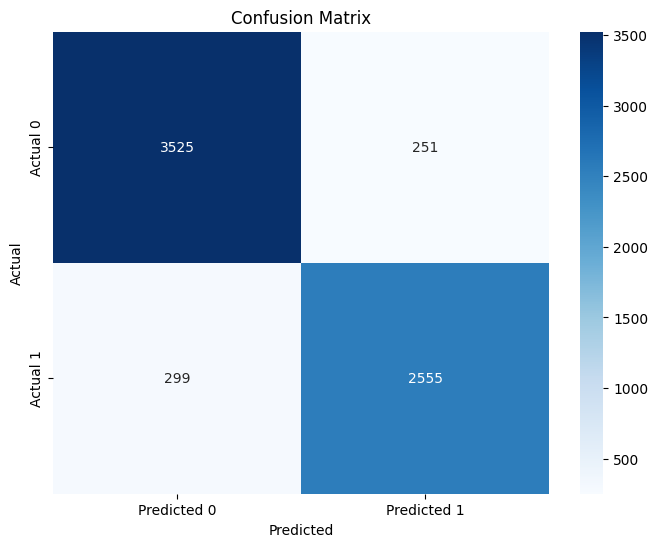

In [ ]:


from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import imageio
from imageio import imread
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
import seaborn as sns

# Update features to include the new numerical features and exclude 'date' column
features = [col for col in df2.columns if col not in ['lightning_caused', 'date', 'general_cause']]
# Prepare your data - IMPORTANT: Ensure all features are present and in the correct format
target = 'lightning_caused'

# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
model_lightning_caused = RandomForestClassifier(n_estimators=200, random_state=42)
model_lightning_caused.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model_lightning_caused.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Mounted at /content/drive


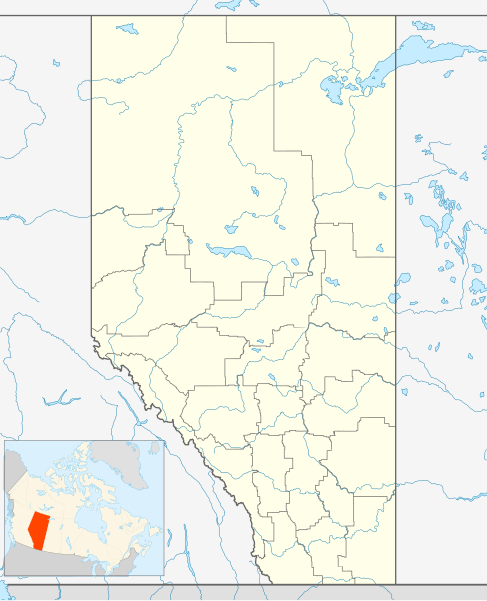

In [ ]:
# prompt: upload a png of alberta from the drive and display it

from google.colab import drive
from IPython.display import Image
drive.mount('/content/drive', force_remount=True)

# Replace 'your_image_path' with the actual path of your PNG file in Google Drive
image_path = '/content/drive/Shareddrives/ENG M 680/Alberta outline.png'  # Adjust the path accordingly

try:
  display(Image(filename=image_path))
except FileNotFoundError:
  print(f"Image not found at path: {image_path}")

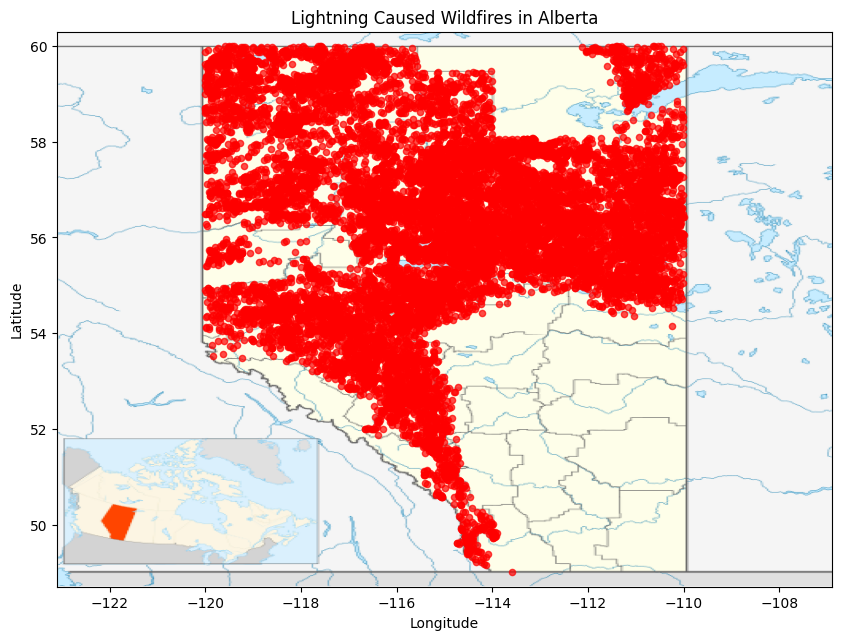

In [ ]:
# prompt: now plot the heat map for this random forest lightening_caused on albarta map as abackground. AND FOR EACH cause USE DIFFERENT plot TO SHOW IT ON MAP and do it seprately beside each other

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

# Assuming 'df2' and 'model_lightning_caused' are already defined from previous code

# Load the Alberta map image
alberta_map = Image.open(image_path)
alberta_map_array = np.array(alberta_map)


# Function to create and display a heatmap on the Alberta map for each cause
def plot_heatmap(cause_column, cause_value, title):
  # Assuming df2 has latitude and longitude columns
  cause_df = df2[df2[cause_column] == cause_value]

  # Extract latitude and longitude
  latitudes = cause_df['latitude'].values
  longitudes = cause_df['longitude'].values

  # Create the plot
  fig, ax = plt.subplots(figsize=(10, 8))

  # Display the Alberta map as the background
  ax.imshow(alberta_map_array, extent=[-123.1, -106.9, 48.7, 60.3]) # Adjust extent if necessary

  # Plot heatmap
  plt.scatter(longitudes, latitudes, c='red', s=20, alpha=0.7)

  # Add labels and title
  ax.set_xlabel("Longitude")
  ax.set_ylabel("Latitude")
  ax.set_title(title)

  # Display the plot
  plt.show()


# Generate heatmap for lightning caused fires
plot_heatmap('lightning_caused', 1, "Lightning Caused Wildfires in Alberta")


# ... (add code to plot other causes in the same way, each in a separate plot)
# Example:
#plot_heatmap('general_cause', 'Human Activity', "Human Activity Caused Wildfires")

# You may need to adjust the 'cause_column' and 'cause_value' based on your data.


In [ ]:
# prompt: print all size_class

import pandas as pd

# Assuming df2 is your DataFrame
print(df2['size_class'].unique())

[3 1 0 2 4]


Accuracy: 0.9420814479638009
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3843
           1       0.92      0.99      0.96      2106
           2       0.60      0.72      0.65       411
           3       1.00      0.01      0.02       126
           4       0.55      0.08      0.13       144

    accuracy                           0.94      6630
   macro avg       0.81      0.56      0.55      6630
weighted avg       0.94      0.94      0.93      6630

Confusion Matrix:


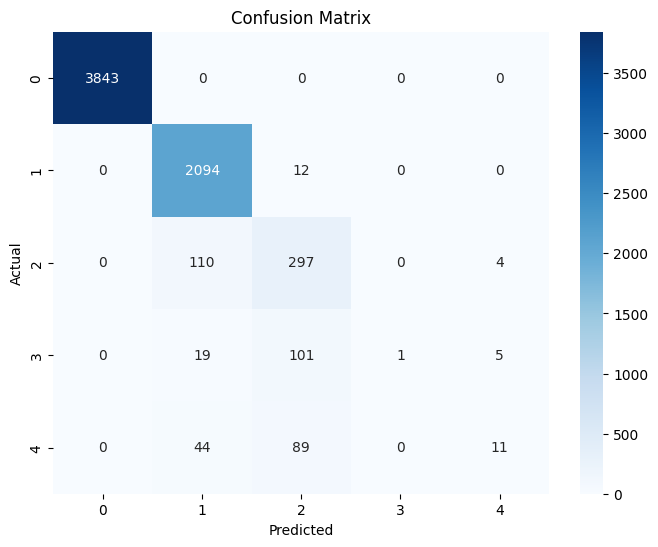

In [ ]:
# prompt: apply random forest
# prompt: Separate the dataset df2 into training (1996–2015) and testing (2016–2020) sets.

# Separate the dataset into training (1996–2015) and testing (2016–2020) sets.
train_df2 = df2[(df2['year'] >= 1996) & (df2['year'] <= 2015)]
test_df2 = df2[(df2['year'] >= 2016) & (df2['year'] <= 2020)]

features = [col for col in df2.columns if col not in ['size_class', 'date',  'general_cause']]
target = 'size_class'

# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
model_size_class = RandomForestClassifier(n_estimators=200, random_state=42)
model_size_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_size_class.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model_size_class.classes_, yticklabels=model_size_class.classes_) # Use model classes for labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

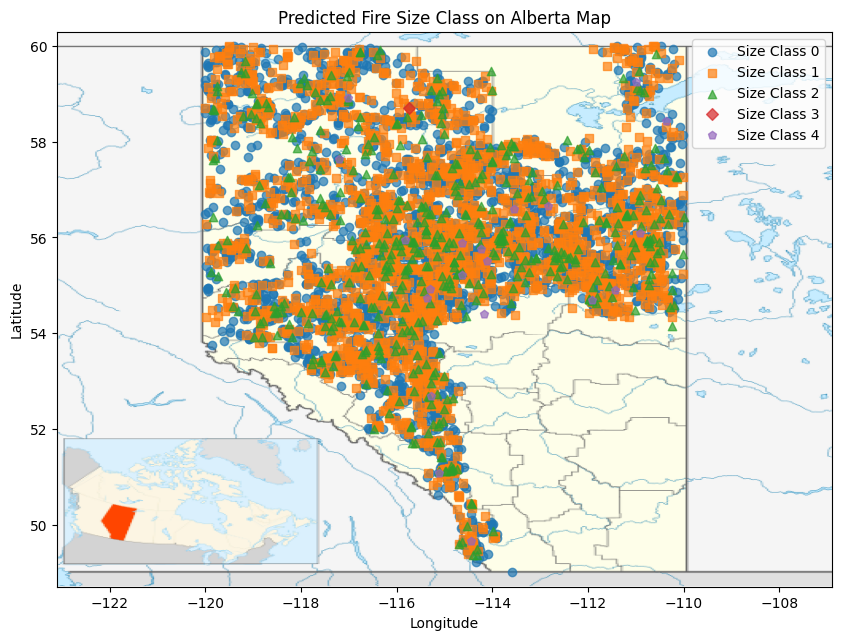

In [ ]:
# prompt: now plot the heat map for this random forest size_class  on albarta map as abackground. AND FOR EACH CLASS USE DIFFERENT SHAPES TO SHOW IT ON MAP.

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Assuming 'df2' and 'y_pred' are already defined from previous code
# and 'image_path' points to your Alberta map image

# Load the Alberta map image
try:
    alberta_map = Image.open(image_path)
    alberta_map = np.array(alberta_map)
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
    exit()  # Exit the script if the image is not found

# Assuming you have latitude and longitude data in your df2
# Replace 'latitude' and 'longitude' with the actual column names
try:
    latitude = df2['latitude']
    longitude = df2['longitude']
except KeyError:
    print("Error: 'latitude' or 'longitude' columns not found in the dataframe.")
    exit()


# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Display the Alberta map as the background
ax.imshow(alberta_map, extent=[-123.1, -106.9, 48.7, 60.3])

# Define markers for each size class
markers = {
    0: 'o',  # Example marker for class 0
    1: 's',  # Example marker for class 1
    2: '^',  # Example marker for class 2
    3: 'D',  # Example marker for class 3
    4: 'p',  # Example marker for class 4
    # Add more markers as needed for additional classes
}
sizes = { #Example sizes. Adjust as you see fit
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 1,
}

# Plot the predicted size classes on the map with different shapes
for size_class in np.unique(y_pred):
    indices = np.where(y_pred == size_class)[0] # Get the indices as a 1D array
    # Use .iloc to access data by position using the numerical indices
    ax.scatter(longitude.iloc[indices], latitude.iloc[indices], label=f'Size Class {size_class}',
               marker=markers.get(size_class, 'x'),  # Default to 'x' if no marker is defined
               alpha=0.7)

# Set plot labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Predicted Fire Size Class on Alberta Map')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [ ]:
# prompt: create a gif for heatmap to show different size_class one by one and finally show it as animation and download it

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import imageio
import os

# ... (Your existing code for data loading, model training, and prediction) ...

# Assuming 'df2', 'y_pred', 'latitude', 'longitude', and 'image_path' are already defined

# Load the Alberta map image
try:
    alberta_map = Image.open(image_path)
    alberta_map = np.array(alberta_map)
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
    exit()

# Define markers and sizes for each size class (adjust as needed)
markers = {0: 'o', 1: 's', 2: '^', 3: 'D', 4: 'p'}
sizes = {0: 10, 1: 20, 2: 30, 3: 40, 4: 50}

# Create a directory to store individual frames
output_dir = "gif_frames"
os.makedirs(output_dir, exist_ok=True)


# Generate individual frames for the GIF
frames = []
for size_class in np.unique(y_pred):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(alberta_map, extent=[-123.1, -106.9, 48.7, 60.3])

    for sc in np.unique(y_pred):  # Iterate through all size classes
        indices = np.where(y_pred == sc)[0]
        ax.scatter(longitude.iloc[indices], latitude.iloc[indices],
                   label=f'Size Class {sc}', marker=markers.get(sc, 'x'),
                   s=sizes.get(sc, 20), alpha=0.5, visible=(sc == size_class)) #Only show current size_class

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Predicted Fire Size Class {size_class} on Alberta Map')
    ax.legend()

    frame_filename = os.path.join(output_dir, f"frame_{size_class}.png")
    plt.savefig(frame_filename)
    plt.close(fig)
    frames.append(imread(frame_filename))


# Create the GIF
imageio.mimsave("size_class_animation.gif", frames, fps=1) # Adjust fps as needed

# Download the GIF
from google.colab import files
files.download("size_class_animation.gif")

<ipython-input-23-bd1caab90130>:50: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imread(frame_filename))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

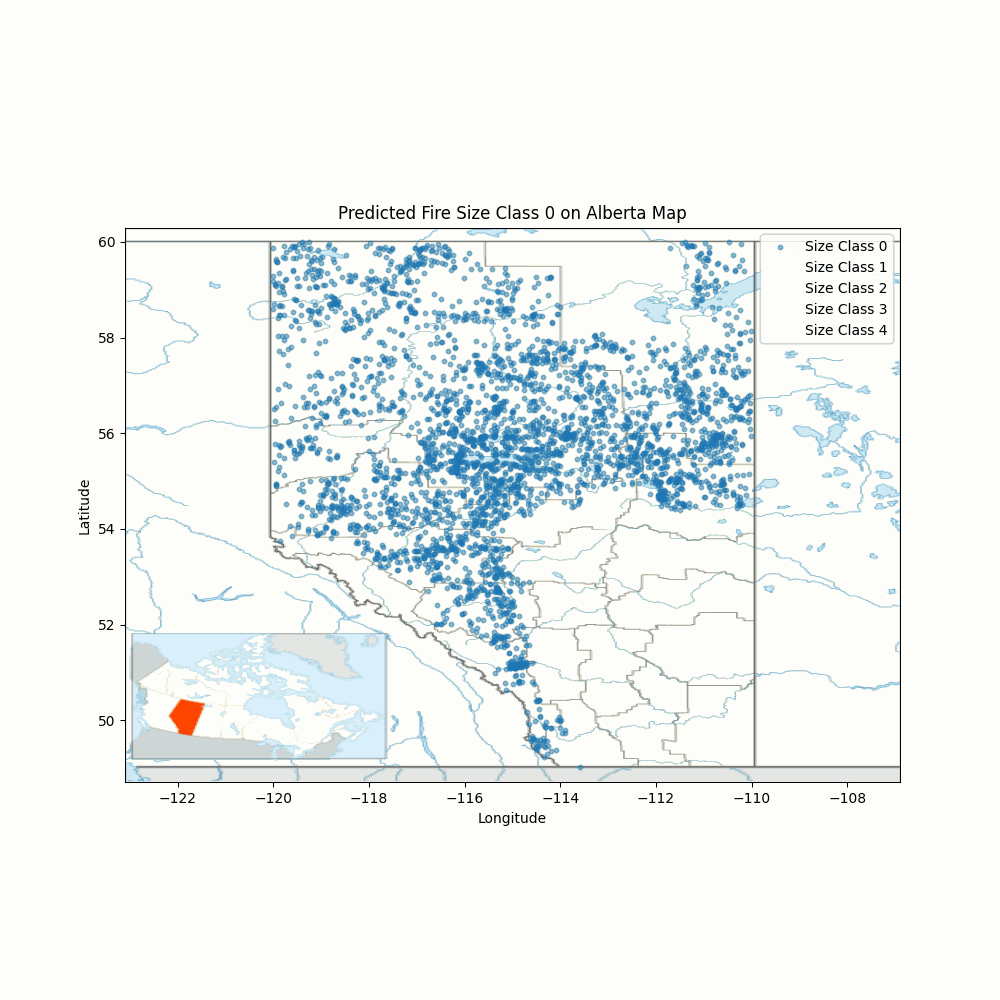

In [ ]:
# prompt: show the above gif on colab

from IPython.display import Image
Image(filename='size_class_animation.gif')

In [ ]:
# Convert 'date' column in df3 to datetime objects if it's not already
df3['date'] = pd.to_datetime(df3['date'])

# Now perform the merge
merged_df = pd.merge(df2, df3, on='date', how='inner')
merged_df

,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,wind_speed_kmh,wind_gust_kmh,wind_azimuth,ffmc,dmc,dc,isi,bui,fwi,dsr
0,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,9.0,NaN,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,20.0,NaN,225,86.8,46.0,292.4,7.4,66.0,20.7,5.81
2,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,14.0,30.0,270,65.4,14.6,206.6,1.1,24.8,1.5,0.06
3,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,5.0,NaN,225,87.2,42.6,246.9,3.7,59.5,11.5,2.05
4,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,2.0,NaN,270,78.0,26.7,256.0,1.0,42.4,2.6,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,9.0,NaN,90,92.1,19.3,71.7,9.1,23.1,14.1,2.92
721,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,5.0,NaN,360,86.0,30.6,332.5,3.1,49.8,9.0,1.32
722,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,8.0,NaN,135,89.2,12.5,35.5,5.7,13.3,7.1,0.88
723,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,30.0,NaN,135,11.4,7.5,63.0,0.0,11.5,0.0,0.00


In [ ]:
# Assuming df2 is your DataFrame
import pandas as pd
# Convert 'date' column to datetime objects
df3['date'] = pd.to_datetime(df3['date'])


# Extract numerical features from the 'date' column
df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
df3['day'] = df3['date'].dt.day
df3['hour'] = df3['date'].dt.hour

In [ ]:
# prompt: REMOVE THE ROWS WITH YEAR BELOW 1996 OF DF3

# Remove rows where 'year' is below 1996
df3 = df3[df3['year'] >= 1996]

In [ ]:
df3.shape
df3.columns

Index(['Unnamed: 0', 'station_id', 'date', 'update_timestamp',
       'dry_bulb_temperature', 'dew_point', 'relative_humidity', 'rain_mm',
       'snow_cm', 'hail_mm', 'precipitation_mm', 'wind_speed_kmh',
       'wind_gust_kmh', 'wind_azimuth', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'dsr', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
# prompt: show the max and min year  df3

print(f"Max year in df3: {df3['year'].max()}")
print(f"Min year in df3: {df3['year'].min()}")

Max year in df3: 2020
Min year in df3: 1996


In [ ]:
# prompt: merge df1 and df3 baced on station_id for all years

# Merge df1 and df3 based on 'station_id' for all years
df13 = pd.merge(df1, df3, on='station_id', how='inner')

# Display the merged DataFrame
df13.head()

,Unnamed: 0.1,Unnamed: 0_x,station_id,name,type,forecast_region,latitude,longitude,elevation_meters,geometry,...,dmc,dc,isi,bui,fwi,dsr,year,month,day,hour
0,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,25,0
1,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,27,0
2,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,28,0
3,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,29,0
4,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,30,0


In [ ]:
df13.shape

(975225, 36)

In [ ]:
# prompt: remove some columns in df13

columns_to_remove_df13 = ['Unnamed: 0.1', 'Unnamed: 0_x', 'station_id', 'name', 'type',
       'forecast_region', 'geometry', 'natural_subregion', 'forest_area', 'Unnamed: 0_y', 'update_timestamp']
df13 = df13.drop(columns=columns_to_remove_df13, errors='ignore')
df13.head()

,latitude,longitude,elevation_meters,date,dry_bulb_temperature,dew_point,relative_humidity,rain_mm,snow_cm,hail_mm,...,dmc,dc,isi,bui,fwi,dsr,year,month,day,hour
0,53.7254,-118.5683,2177.63,1996-05-25,6.0,-1.0,60.62,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,25,0
1,53.7254,-118.5683,2177.63,1996-05-27,0.5,-1.9,83.66,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,27,0
2,53.7254,-118.5683,2177.63,1996-05-28,-2.5,NaN,NaN,0.0,4.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,28,0
3,53.7254,-118.5683,2177.63,1996-05-29,-1.5,NaN,NaN,0.0,4.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,29,0
4,53.7254,-118.5683,2177.63,1996-05-30,-0.5,NaN,NaN,0.0,3.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,30,0


In [ ]:
# prompt: handle missing value  with most repetitive one for each logititude and latitude in df13
import numpy as np

# Group data by latitude and longitude
grouped = df13.groupby(['latitude', 'longitude'])

# Iterate through each group
for (latitude, longitude), group in grouped:
    # Identify numeric columns with missing values in the current group
    numeric_cols = group.select_dtypes(include=np.number).columns
    cols_with_missing = [col for col in numeric_cols if group[col].isnull().any()]

    # Iterate through columns with missing values
    for col in cols_with_missing:
        # Find the most frequent value for the column in this group, handling empty mode
        mode_values = group[col].mode()

        # If mode is empty, use NaN instead. You can change this to any other default value.
        most_frequent_value = mode_values[0] if not mode_values.empty else np.nan

        # Fill the missing values with the most frequent value
        df13.loc[(df13['latitude'] == latitude) & (df13['longitude'] == longitude), col] = df13.loc[(df13['latitude'] == latitude) & (df13['longitude'] == longitude), col].fillna(most_frequent_value)

In [ ]:
# Convert 'date' column in df13 to datetime if it's not already
df13['date'] = pd.to_datetime(df13['date'])


In [ ]:
# prompt: merge df13 and df2 based on same year and month and day

# Merge df13 and df2 based on 'year', 'month', and 'day'
df13['date'] = pd.to_datetime(df13['date'])
df13['year'] = df13['date'].dt.year
df13['month'] = df13['date'].dt.month
df13['day'] = df13['date'].dt.day

df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day

merged_df = pd.merge(df13, df2, on=['year', 'month', 'day'], how='inner')
df123=merged_df
df123.shape

(4524410, 49)

In [ ]:
# prompt: print max value and min value of year in df123

print(f"Max year in df123: {df123['year'].max()}")
print(f"Min year in df123: {df123['year'].min()}")

Max year in df123: 2020
Min year in df123: 1996


In [ ]:
# prompt: now reorgonize the df123 based on smallest to biggest value for year

# Sort df123 by the 'year' column in ascending order
df123 = df123.sort_values(by='year', ascending=True)
df123

,latitude_x,longitude_x,elevation_meters,date_x,dry_bulb_temperature,dew_point,relative_humidity_x,rain_mm,snow_cm,hail_mm,...,temperature,relative_humidity_y,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,hour_y,lightning_caused
0,53.7254,-118.5683,2177.63,1996-05-25,6.0,-1.0,60.62,0.00,0.00,0.0,...,17.943677,45.587522,191.690331,0.0,3,9,0,19.633333,19,0
1073342,56.9940,-113.4245,615.06,1996-04-25,2.0,-3.0,69.43,0.40,0.01,0.0,...,17.943677,45.587522,270.000000,6.0,3,9,0,15.250000,15,0
1073343,56.9940,-113.4245,615.06,1996-04-25,2.0,-3.0,69.43,0.40,0.01,0.0,...,17.943677,45.587522,270.000000,15.0,2,74,1,22.550000,22,0
1073344,56.9940,-113.4245,615.06,1996-04-26,2.5,1.0,89.81,0.40,1.00,0.0,...,17.943677,45.587522,270.000000,25.0,3,1318,2,15.000000,15,0
1073345,56.9940,-113.4245,615.06,1996-04-26,2.5,1.0,89.81,0.40,1.00,0.0,...,17.943677,45.587522,270.000000,10.0,3,915,1,15.916667,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310834,54.4569,-116.4409,1048.00,2020-09-16,13.4,5.0,56.00,0.00,0.00,0.0,...,16.000000,55.000000,225.000000,2.0,0,9,0,8.416667,8,0
1310833,54.4569,-116.4409,1048.00,2020-09-16,13.4,5.0,56.00,0.00,0.00,0.0,...,7.000000,90.000000,191.690331,0.0,0,19,1,6.833333,6,0
1310832,54.4569,-116.4409,1048.00,2020-09-12,9.2,5.0,72.00,0.00,0.00,0.0,...,11.000000,24.000000,225.000000,11.0,3,1,0,16.800000,16,0
1310841,54.4569,-116.4409,1048.00,2020-09-20,14.8,6.0,55.00,5.72,0.00,0.0,...,18.000000,20.000000,191.690331,0.0,2,0,0,17.116667,17,0


This ONE!

In [ ]:
# prompt: group both df2 and df13 based on their year, month and day. find the same group for both datasets and iterate on each common group to find the common latitude and longitude and merged two datasets by these common data

# Assuming df13 and df2 are already defined and preprocessed as in your provided code.

# Group df2 by 'day', 'month', and 'year'
grouped_df2 = df2.groupby(['day', 'month', 'year'])

# Create an empty list to store the merged dataframes for each group
merged_dataframes = []

# Iterate through each group in df2
for (day, month, year), group in grouped_df2:
    # Filter df13 for the same 'day', 'month', and 'year'
    df13_group = df13[(df13['day'] == day) & (df13['month'] == month) & (df13['year'] == year)]

    # Find common latitude and longitude values between the current group and df13
    common_locations = pd.merge(group, df13_group, on=['latitude', 'longitude'], how='inner')

    # Append the merged dataframe for this group to the list
    if not common_locations.empty:
        merged_dataframes.append(common_locations)

# Concatenate the merged dataframes from all groups into a single dataframe
if merged_dataframes:
    final_merged_df = pd.concat(merged_dataframes)
    print(final_merged_df.head())
else:
    print("No common latitude and longitude values found between df13 and any of the groups in df2")

No common latitude and longitude values found between df13 and any of the groups in df2


In [ ]:
# prompt: if there is No common latitude and longitude values found between df13 and any of the groups in df2, then find the closest langititude and latitude for the same year, month and data. also please insert a column to show the distance between the actual ones and the closest matches

# Assuming df13, df2, and other necessary variables are already defined

# Group df2 by 'day', 'month', and 'year'
grouped_df2 = df2.groupby(['day', 'month', 'year'])

# Create an empty list to store the merged dataframes for each group
merged_dataframes = []

# Iterate through each group in df2
for (day, month, year), group in grouped_df2:
    # Filter df13 for the same 'day', 'month', and 'year'
    df13_group = df13[(df13['day'] == day) & (df13['month'] == month) & (df13['year'] == year)]

    # Find common latitude and longitude values between the current group and df13
    common_locations = pd.merge(group, df13_group, on=['latitude', 'longitude'], how='inner')

    if not common_locations.empty:
        merged_dataframes.append(common_locations)
    else:
        # Find the closest latitude and longitude in df13 for the current group
        distances = []
        for index1, row1 in group.iterrows():
            min_distance = float('inf')
            closest_location = None
            for index2, row2 in df13_group.iterrows():
                distance = np.sqrt((row1['latitude'] - row2['latitude'])**2 + (row1['longitude'] - row2['longitude'])**2)
                if distance < min_distance:
                    min_distance = distance
                    closest_location = row2
            distances.append({'distance': min_distance, 'closest_location': closest_location})

        distances_df = pd.DataFrame(distances)

        # Drop conflicting columns before merging
        closest_location_df = distances_df['closest_location'].apply(pd.Series).reset_index(drop=True)
        conflicting_columns = closest_location_df.columns.intersection(group.columns)
        closest_location_df = closest_location_df.drop(columns=conflicting_columns, errors='ignore')

        closest_matches = pd.concat([group.reset_index(drop=True), closest_location_df, distances_df['distance']], axis=1)
        merged_dataframes.append(closest_matches)

# Concatenate and rename distance column
if merged_dataframes:
    final_merged_df = pd.concat(merged_dataframes)
    final_merged_df = final_merged_df.rename(columns={0: 'distance'}) #It also includes a distance column to show how far the closest match is.
else:
    print("No common latitude and longitude values found between df13 and any of the groups in df2")

print(final_merged_df.head())
print(len(final_merged_df))

   year                date  smoke_type  smoke_color  smoke_base_size  \
0  1999 1999-01-01 00:01:00           4            5                5   
0  2000 2000-01-01 08:00:00           4            5                5   
0  2011 2011-01-01 09:17:00           4            5                5   
0  2012 2012-01-01 18:47:00           4            5                5   
0  2016 2016-01-01 15:20:00           4            5                5   

   condition_of_smoke   latitude   longitude  fire_spread_rate  fire_type  \
0                   3  56.554000 -111.069100               0.1          5   
0                   3  56.713600 -110.449000               0.0          5   
0                   3  54.728533 -115.493933               0.0          4   
0                   3  51.127700 -114.959217               0.0          5   
0                   3  56.684297 -111.384317               0.0          4   

   ...  wind_gust_kmh  wind_azimuth  ffmc  dmc     dc  isi   bui  fwi  dsr  \
0  ...           30.

In [ ]:
# prompt: print max value and min value of year in fdf
fdf=final_merged_df
print(f"Max year in fdf: {fdf['year'].max()}")
print(f"Min year in fdf: {fdf['year'].min()}")

Max year in fdf: 2021
Min year in fdf: 1990


Fire Occurrence Prediction - Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      6188

    accuracy                           1.00      6188
   macro avg       1.00      1.00      1.00      6188
weighted avg       1.00      1.00      1.00      6188

Fire Occurrence Prediction - Confusion Matrix:
[[6188]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


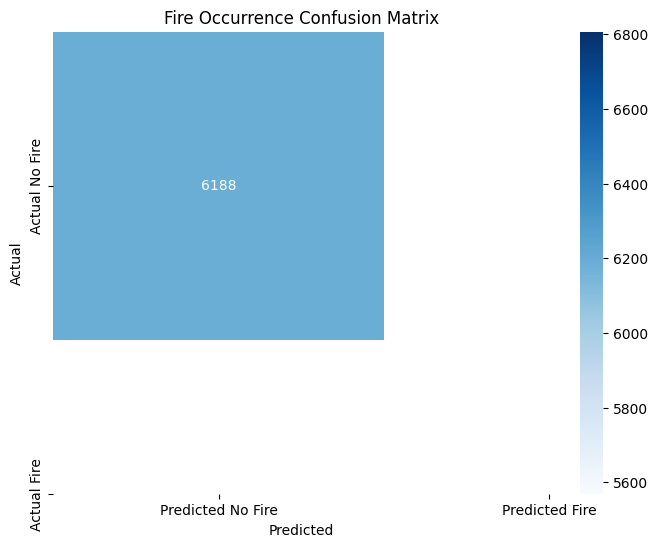

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


# Assuming 'final_merged_df' is your dataframe (fdf in your code)
# Create the target variable based on general_cause
fdf['fire_occurred'] = fdf['general_cause'].notna().astype(int)

# Define the relevant causes for prediction
relevant_causes = ['lightning', 'resident', 'incendiary', 'recreation', 'industry']

# Combine industry causes (assuming multiple columns exist for various industry types)
# Replace 'industry1', 'industry2', etc., with your actual industry cause column names
# fdf['industry'] = fdf[['industry1', 'industry2']].any(axis=1).astype(int) # Example

# Limit general_cause to relevant causes. Handle missing values (NaN)
fdf['general_cause_limited'] = fdf['general_cause'].apply(lambda x: x if x in relevant_causes else None)


# Prepare the features and target variables for the 'fire_occurred' prediction
features_fire = [col for col in fdf.columns if col not in ['fire_occurred', 'general_cause', 'general_cause_limited', 'size_class', 'date']]
target_fire = 'fire_occurred'

# Split the data into training and validation sets based on year
train_fire = fdf[fdf['year'] < 2015]
val_fire = fdf[fdf['year'] >= 2015]

X_train_fire = train_fire[features_fire]
y_train_fire = train_fire[target_fire]
X_val_fire = val_fire[features_fire]
y_val_fire = val_fire[target_fire]

# Replace infinite values with NaN
X_train_fire = X_train_fire.replace([np.inf, -np.inf], np.nan)
X_val_fire = X_val_fire.replace([np.inf, -np.inf], np.nan)

# Impute NaN values using a suitable strategy (e.g., mean)
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
X_train_fire = pd.DataFrame(imputer.fit_transform(X_train_fire), columns=X_train_fire.columns)
X_val_fire = pd.DataFrame(imputer.transform(X_val_fire), columns=X_val_fire.columns)


# Train the Random Forest model for fire occurrence prediction
model_fire = RandomForestClassifier(n_estimators=200, random_state=42)
model_fire.fit(X_train_fire, y_train_fire)

# Make predictions on the validation set
y_pred_fire = model_fire.predict(X_val_fire)

# Evaluate the model
accuracy_fire = accuracy_score(y_val_fire, y_pred_fire)
print(f"Fire Occurrence Prediction - Accuracy: {accuracy_fire}")
print(classification_report(y_val_fire, y_pred_fire))

# Print the confusion matrix
conf_matrix_fire = confusion_matrix(y_val_fire, y_pred_fire)
print("Fire Occurrence Prediction - Confusion Matrix:")
print(conf_matrix_fire)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_fire, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Fire', 'Predicted Fire'],
            yticklabels=['Actual No Fire', 'Actual Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fire Occurrence Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Assuming the dataset is already loaded as `fdf`
# fdf = pd.read_csv("path_to_your_dataset.csv")  # Uncomment if loading from a file

# Step 1: Create target columns
fdf["fire_occurred"] = np.where(fdf["general_cause"].notna(), 1, 0)
fdf["general_cause"] = fdf["general_cause"].replace(
    {"Recreational": "Recreational/Industries", "Industries": "Recreational/Industries"}
)
relevant_causes = ["Lightning", "Resident", "Incendiary", "Recreational/Industries"]
fdf = fdf[fdf["general_cause"].isin(relevant_causes) | (fdf["fire_occurred"] == 0)]

# Step 2: Handle datetime columns
datetime_cols = fdf.select_dtypes(include=["datetime64[ns]"]).columns
for col in datetime_cols:
    fdf[f"{col}_year"] = fdf[col].dt.year
    fdf[f"{col}_month"] = fdf[col].dt.month
    fdf[f"{col}_day"] = fdf[col].dt.day
    fdf.drop(columns=[col], inplace=True)

# Step 3: Split the dataset
binary_train = fdf[(fdf["year"] >= 1996) & (fdf["year"] <= 2015)]
binary_test = fdf[(fdf["year"] >= 2016) & (fdf["year"] <= 2020)]

multiclass_train = binary_train[binary_train["fire_occurred"] == 1]
multiclass_test = binary_test[binary_test["fire_occurred"] == 1]

exclude_columns = ["general_cause", "fire_occurred", "fire_number", "year"]
binary_features = [col for col in fdf.columns if col not in exclude_columns]

# Prepare features and targets
X_binary_train = binary_train[binary_features]
y_binary_train = binary_train["fire_occurred"]
X_binary_test = binary_test[binary_features]
y_binary_test = binary_test["fire_occurred"]

X_multiclass_train = multiclass_train[binary_features]
y_multiclass_train = multiclass_train["general_cause"]
X_multiclass_test = multiclass_test[binary_features]
y_multiclass_test = multiclass_test["general_cause"]

# Step 4: Handle non-numeric data
label_encoders = {}
for col in X_binary_train.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    combined_data = pd.concat([X_binary_train[col], X_binary_test[col],
                               X_multiclass_train[col], X_multiclass_test[col]], axis=0)
    le.fit(combined_data.astype(str))
    X_binary_train[col] = le.transform(X_binary_train[col].astype(str))
    X_binary_test[col] = le.transform(X_binary_test[col].astype(str))
    X_multiclass_train[col] = le.transform(X_multiclass_train[col].astype(str))
    X_multiclass_test[col] = le.transform(X_multiclass_test[col].astype(str))
    label_encoders[col] = le

# Impute missing values
numerical_imputer = SimpleImputer(strategy="mean")
categorical_imputer = SimpleImputer(strategy="most_frequent")
for df in [X_binary_train, X_binary_test, X_multiclass_train, X_multiclass_test]:
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            df[col] = numerical_imputer.fit_transform(df[[col]])
        else:
            df[col] = categorical_imputer.fit_transform(df[[col]])

# Step 5: Train models
# Binary Classification
binary_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
binary_model.fit(X_binary_train, y_binary_train)
y_binary_pred = binary_model.predict(X_binary_test)

# Multiclass Classification
multiclass_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
multiclass_model.fit(X_multiclass_train, y_multiclass_train)
y_multiclass_pred = multiclass_model.predict(X_multiclass_test)

# Step 6: Evaluate metrics
# Binary Classification Metrics
print("Binary Classification Report:")
print(classification_report(y_binary_test, y_binary_pred))
print("Binary Classification Confusion Matrix:")
print(confusion_matrix(y_binary_test, y_binary_pred))

# Multiclass Classification Metrics
unique_test_classes = set(y_multiclass_test.unique())
unique_pred_classes = set(y_multiclass_pred)
present_classes = list(unique_test_classes.intersection(unique_pred_classes))
present_class_names = [cause for cause in relevant_causes if cause in present_classes]

print("\nMulticlass Classification Report:")
print(classification_report(y_multiclass_test, y_multiclass_pred, target_names=present_class_names))
print("Multiclass Classification Confusion Matrix:")
print(confusion_matrix(y_multiclass_test, y_multiclass_pred, labels=present_classes))


<ipython-input-44-d86345cc2b43>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["fire_occurred"] = np.where(fdf["general_cause"].notna(), 1, 0)
<ipython-input-44-d86345cc2b43>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf["general_cause"] = fdf["general_cause"].replace(
<ipython-input-44-d86345cc2b43>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

Binary Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3311

    accuracy                           1.00      3311
   macro avg       1.00      1.00      1.00      3311
weighted avg       1.00      1.00      1.00      3311

Binary Classification Confusion Matrix:
[[3311]]

Multiclass Classification Report:
              precision    recall  f1-score   support

   Lightning       0.92      0.57      0.70       748
    Resident       1.00      1.00      1.00      1819
  Incendiary       0.69      0.95      0.80       744

    accuracy                           0.89      3311
   macro avg       0.87      0.84      0.83      3311
weighted avg       0.91      0.89      0.89      3311

Multiclass Classification Confusion Matrix:
[[ 426    0  322]
 [   0 1819    0]
 [  39    0  705]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
# prompt: count number of rows in the fdf file, and how many rows have a general_cause empty

# Assuming fdf is your DataFrame (final_merged_df from your provided code)

num_rows = len(fdf)
num_empty_general_cause = fdf['general_cause'].isna().sum()

print(f"Number of rows in the DataFrame: {num_rows}")
print(f"Number of rows with empty 'general_cause': {num_empty_general_cause}")

Number of rows in the DataFrame: 25650
Number of rows with empty 'general_cause': 0
